In [5]:
using Turing, MCMCChains
using Plots, StatsPlots, StatsFuns
using Distributions

In [22]:
births = 978
fem_births = 437;

In [23]:
@model model_birth(births, y) = begin
    theta ~ Uniform(0, 1)
    y ~ Binomial(births, theta)
end;

In [24]:
model = model_birth(births, fem_births)
chain = sample(model, NUTS(), 3_000);

┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference /Users/extra/.julia/packages/Turing/gQLRw/src/inference/hmc.jl:195
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/extra/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


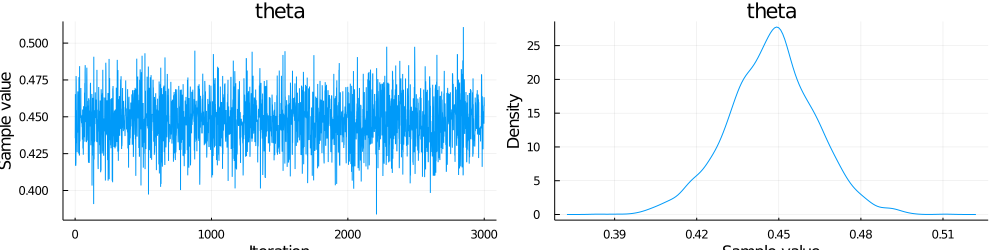

In [25]:
plot(chain)

In [44]:
@model poisson_model(y) = begin
    theta_1 ~ Gamma(3, 1/5)
    y ~ Poisson(2*theta_1)
end

poisson_model (generic function with 1 method)

In [45]:
model_p = poisson_model(3)
chain2 = sample(model_p, NUTS(), 50000);

┌ Info: Found initial step size
│   ϵ = 1.6
└ @ Turing.Inference /Users/extra/.julia/packages/Turing/gQLRw/src/inference/hmc.jl:195
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01


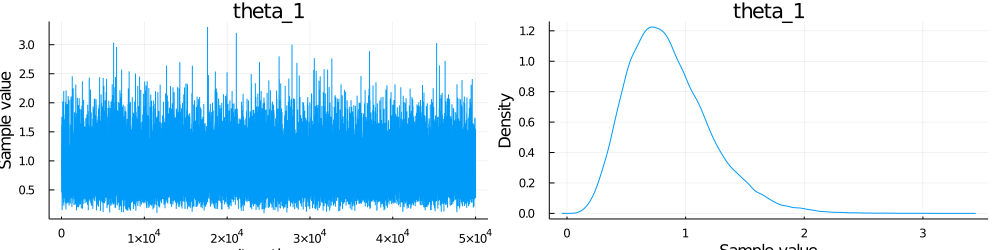

In [46]:
plot(chain2)

In [37]:
chain2

Chains MCMC chain (50000×13×1 Array{Float64,3}):

Iterations        = 1:50000
Thinning interval = 1
Chains            = 1
Samples per chain = 50000
parameters        = theta_1
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth

Summary Statistics
  parameters      mean       std   naive_se      mcse          ess      rhat 
      Symbol   Float64   Float64    Float64   Float64      Float64   Float64 

     theta_1    1.6361    0.2813     0.0013    0.0020   20063.1364    1.0001

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

     theta_1    1.1310    1.4384    1.6216    1.8174    2.2271
